<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment02/assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment02**
Name: Lee Suyoung


Student ID: 20164111

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **1. Set variables**

In [0]:
num=100  #number of trainning data
std =5  #std of trainning data 

## define function
def fun(x):
    f=3*x+2
    return f
  
## set trainning data
n = np.random.rand(num)
nn = n - np.mean(n)
xData = np.linspace(-10,10,num)
Y_func = fun(xData)
yData = Y_func + nn * std

## set theta variables
theta1=tf.Variable(tf.random_normal([1],name='weight'))
theta0=tf.Variable(tf.random_normal([1],name='bias'))
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
cost_history=[]
theta1_history=[]
theta0_history=[]

## hypothesis XW+b
H= X*theta1 + theta0

## **2. Cost function and Gradient Descent**

In [0]:
## cost function
cost=0.5*tf.reduce_mean(tf.square(H-Y))

## minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

## **3. Fit the data**

In [0]:
## launch the graph in a session
sess=tf.Session()

## initializes the graph in a session
sess.run(tf.global_variables_initializer())

## fit the line with new trainig data
for step in range(3001):
    sess.run(train,feed_dict={X:xData, Y:yData})
    
    # save the history
    theta0_history.extend(sess.run(theta0,feed_dict={X:xData, Y:yData}))
    theta1_history.extend(sess.run(theta1,feed_dict={X:xData, Y:yData}))
    cost_history.append(sess.run(cost,feed_dict={X:xData, Y:yData}))

## **4. Plotting the results**

4.1. input data

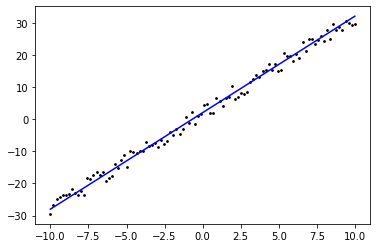

In [5]:
plt.scatter(xData,yData,color='black',s=3) # trainning data
plt.plot(xData,Y_func,color='blue') ## y=3x+2
plt.show()

4.2. output results

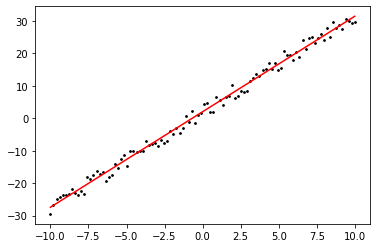

In [6]:
## make output linear function
def fun_H(x): 
    f=sess.run(theta1)*x + sess.run(theta0)
    return f

Y_plot=fun_H(xData)

plt.scatter(xData,yData,color='black',s=3)
plt.plot(xData,Y_plot,color='red')
plt.show()

4.3. Energy values


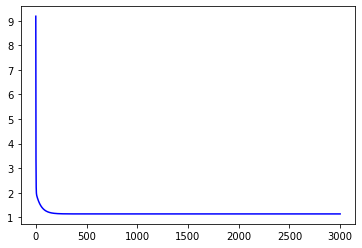

In [7]:
plt.plot(cost_history,color='blue')
plt.show()

4.4 Modle parameters

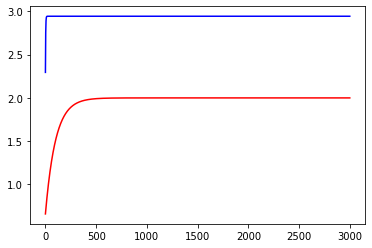

In [8]:
plt.plot(theta0_history,color='red')
plt.plot(theta1_history,color='blue')
plt.show()